<a href="https://colab.research.google.com/github/shyamjith94/Machine-Learning-Regression/blob/main/K_NearestNeighborsRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
!pip install turicreate

In [2]:
import turicreate as tc
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from math import log, sqrt
from sklearn.utils import shuffle

In [21]:
data = tc.SFrame.read_csv("/content/drive/My Drive/Machine Learning: Regression/Data/3/kc_house_data_small.csv")

Finished parsing file /content/drive/My Drive/Machine Learning: Regression/Data/3/kc_house_data_small.csv

Parsing completed. Parsed 100 lines in 0.594946 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,str,int,int,float,int,int,float,int,int,int,int,int,int,int,int,int,float,float,int,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /content/drive/My Drive/Machine Learning: Regression/Data/3/kc_house_data_small.csv

Parsing completed. Parsed 8703 lines in 0.050017 secs.

In [38]:
data.head()

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition
7129300520,20141013T000000,221900,3,1.0,1180,5650,1.0,0,0,3
6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,3
5631500400,20150225T000000,180000,2,1.0,770,10000,1.0,0,0,3
2487200875,20141209T000000,604000,4,3.0,1960,5000,1.0,0,0,5
1954400510,20150218T000000,510000,3,2.0,1680,8080,1.0,0,0,3
2008000270,20150115T000000,291850,3,1.5,1060,9711,1.0,0,0,3
2414600126,20150415T000000,229500,3,1.0,1780,7470,1.0,0,0,3
1736800520,20150403T000000,662500,3,2.5,3560,9796,1.0,0,0,3
9297300055,20150124T000000,650000,4,3.0,2950,5000,2.0,0,3,3
6865200140,20140529T000000,485000,4,1.0,1600,4300,1.5,0,0,4


**Convert SFrame Data to Numpy**

In [4]:
def get_numpy_data(frame, feature, output):
    """ convert sframe to numpy data
        frame   :- Sframe
        feature :- list of fetures
        output  :- name of output variable (price)
        return  :- two arrays feature matrix and output array"""
    # add constant to sframe
    frame["constant"] = 1 
    feature = ["constant"] + feature
    
    # select feature column from frame include contant
    feature_frame = frame[feature]

    # convert to numpy
    feature_matrix = feature_frame.to_numpy()

    # select feature column from frame
    output_frame = frame[output]
    
    # convert to numpy
    output_array = output_frame.to_numpy()
    return (feature_matrix, output_array)

In [5]:
def normalize_feature(feature_matrix):
    """ feature_matrix  :- numpy matrix of feature values
        return          :- feature_matrix, normalized feture_matrix 
        """
    norm_feature = np.linalg.norm(feature_matrix, axis=0)
    normalize_feature = feature_matrix/norm_feature
    return normalize_feature,norm_feature 

In [22]:
(train_and_validation, test) = data.random_split(.8, seed=1) # initial train/test split
(train, validation) = train_and_validation.random_split(.8, seed=1) # split training set into training and validation sets

In [8]:
feature_list = ['bedrooms',  
                'bathrooms',  
                'sqft_living',  
                'sqft_lot',  
                'floors',
                'waterfront',  
                'view',  
                'condition',  
                'grade',  
                'sqft_above',  
                'sqft_basement',
                'yr_built',  
                'yr_renovated',  
                'lat',  
                'long',  
                'sqft_living15',  
                'sqft_lot15']

**Convert to Numpy Matrix**

In [23]:
features_train, output_train = get_numpy_data(train, feature_list, 'price')
features_test, output_test = get_numpy_data(test, feature_list, 'price')
features_valid, output_valid = get_numpy_data(validation, feature_list, 'price')

**Normalize Data**

In [24]:
features_train, norms = normalize_feature(features_train)
features_train

array([[ 0.01345102,  0.01163464,  0.00602491, ..., -0.01345623,
         0.00861561,  0.00229178],
       [ 0.01345102,  0.01163464,  0.01355605, ..., -0.01346306,
         0.01086596,  0.00309857],
       [ 0.01345102,  0.00775643,  0.00602491, ..., -0.01345359,
         0.0174884 ,  0.00327015],
       ...,
       [ 0.01345102,  0.01163464,  0.01506227, ..., -0.01341485,
         0.0145951 ,  0.00232464],
       [ 0.01345102,  0.01551285,  0.01506227, ..., -0.01344633,
         0.01620249,  0.00244308],
       [ 0.01345102,  0.01163464,  0.01506227, ..., -0.01346603,
         0.00983723,  0.00061209]])

In [25]:
norms

array([7.43437960e+01, 2.57850732e+02, 1.65977596e+02, 1.67688695e+05,
       3.11491224e+06, 1.17240138e+02, 6.32455532e+00, 5.87962584e+01,
       2.57906960e+02, 5.75318173e+02, 1.45365513e+05, 3.90863965e+04,
       1.46559338e+05, 2.99361461e+04, 3.53588887e+03, 9.08552952e+03,
       1.55531640e+05, 2.46533053e+06])

In [26]:
features_test = features_test/norms
features_test

array([[ 0.01345102,  0.01551285,  0.01807473, ..., -0.01346922,
         0.01375926,  0.0016225 ],
       [ 0.01345102,  0.01551285,  0.00602491, ..., -0.0134657 ,
         0.01035159,  0.00174419],
       [ 0.01345102,  0.01163464,  0.01054359, ..., -0.01346141,
         0.00977293,  0.00252907],
       ...,
       [ 0.01345102,  0.00775643,  0.01355605, ..., -0.01343598,
         0.00797265,  0.00030422],
       [ 0.01345102,  0.01551285,  0.02108718, ..., -0.01344908,
         0.01832425,  0.00231531],
       [ 0.01345102,  0.01163464,  0.01054359, ..., -0.01342817,
         0.00848702,  0.00458478]])

In [27]:
features_valid = features_valid/norms
features_valid

array([[ 0.01345102,  0.01551285,  0.01054359, ..., -0.01346548,
         0.00900138,  0.00202001],
       [ 0.01345102,  0.01939106,  0.01506227, ..., -0.01344655,
         0.01440221,  0.0028414 ],
       [ 0.01345102,  0.01551285,  0.01054359, ..., -0.01346845,
         0.00938716,  0.00202813],
       ...,
       [ 0.01345102,  0.00775643,  0.01506227, ..., -0.01347054,
         0.00630097,  0.00041495],
       [ 0.01345102,  0.00775643,  0.00903736, ..., -0.01346042,
         0.0072654 ,  0.00047012],
       [ 0.01345102,  0.01163464,  0.01204982, ..., -0.01345964,
         0.00900138,  0.00049892]])

**Compute Distance**

In [28]:
print("Test")
print(features_test[0])
print("\nTrain")
print(features_train[9])

Test
[ 0.01345102  0.01551285  0.01807473  0.01759212  0.00160518  0.017059
  0.          0.05102365  0.0116321   0.01564352  0.01362084  0.02481682
  0.01350306  0.          0.01345387 -0.01346922  0.01375926  0.0016225 ]

Train
[ 0.01345102  0.01163464  0.00602491  0.0083488   0.00050756  0.01279425
  0.          0.          0.01938684  0.01390535  0.0096309   0.
  0.01302544  0.          0.01346821 -0.01346251  0.01195898  0.00156612]


**The Euclidean distance between the query house and the 10th house of the training set**

In [29]:
np.sqrt(np.sum((features_train[9] - features_test[0])**2))

0.05972359371398078

**Compute Multiple Distance**

In [31]:
multiple_distance = []
for training_house in features_train[0:10]:
     multiple_distance.append(np.sqrt(np.sum((training_house-features_test[0])**2)))
multiple_distance

[0.06027470916295592,
 0.08546881147643746,
 0.06149946435279315,
 0.05340273979294363,
 0.05844484060170442,
 0.059879215098128345,
 0.05463140496775461,
 0.055431083236146074,
 0.052383627840220305,
 0.05972359371398078]

In [35]:
multiple_distance = np.array(multiple_distance)
arg = np.argmin(multiple_distance)
print(np.argmin(multiple_distance), "--", multiple_distance[arg])

8 -- 0.052383627840220305


In [37]:
diff = features_train - features_test[0]
diff

array([[ 0.00000000e+00, -3.87821276e-03, -1.20498190e-02, ...,
         1.29876855e-05, -5.14364795e-03,  6.69281453e-04],
       [ 0.00000000e+00, -3.87821276e-03, -4.51868214e-03, ...,
         6.16364736e-06, -2.89330197e-03,  1.47606982e-03],
       [ 0.00000000e+00, -7.75642553e-03, -1.20498190e-02, ...,
         1.56292487e-05,  3.72914476e-03,  1.64764925e-03],
       ...,
       [ 0.00000000e+00, -3.87821276e-03, -3.01245476e-03, ...,
         5.43721749e-05,  8.35842791e-04,  7.02137088e-04],
       [ 0.00000000e+00,  0.00000000e+00, -3.01245476e-03, ...,
         2.28935473e-05,  2.44323277e-03,  8.20579624e-04],
       [ 0.00000000e+00, -3.87821276e-03, -3.01245476e-03, ...,
         3.19188881e-06, -3.92203156e-03, -1.01041218e-03]])

In [39]:
distances = np.sqrt(np.sum(diff**2,axis=1))
distances

array([0.06027471, 0.08546881, 0.06149946, ..., 0.05716729, 0.05705739,
       0.05846758])

In [40]:
def get_distances(training_features_matrix, single_feature_vector):
    """ Finding the distance of matrix from two matrixes 
        training_features_matrix    :- entire training set or validation set
        single_feature_vector       :- single column from matrix 
        return                      :- distances
        """
    diff = training_features_matrix - single_feature_vector
    distances = np.sqrt(np.sum(diff**2,axis=1))
    return distances

**Compute 1 nearest neighbor regression for a single query house**

In [41]:
distances_to_third_house = get_distances(features_train, features_test[2])
np.argsort(distances_to_third_house)

array([ 382, 1149, 4087, ..., 1107, 5226, 2486])

In [42]:
## the index of the house in the training set that is closest to this query house
np.argmin(distances_to_third_house)

382

In [44]:
output_train

array([221900, 538000, 180000, ..., 507250, 610685, 360000])

In [43]:
## predicted value of the query house based on 1-nearest neighbor regression
output_train[382]

249000

**Perform k-nearest neighbor regression**


In [46]:
def get_distances_k_nearest_neighbors(k, training_features_matrix, single_feature_vector):
    """ Finding the distance of matrix from two matrixes 
        training_features_matrix    :- entire training set or validation set
        single_feature_vector       :- single column from matrix
        k                           :- value from return to array
        return                      :- K the value from sorted array
        """
    diff = training_features_matrix - single_feature_vector
    distances = np.sqrt(np.sum(diff**2,axis=1))
    nearest_neighbors = np.argsort(distances)
    return nearest_neighbors[0:k]

In [48]:
n = get_distances_k_nearest_neighbors(4, features_train, features_test[2])
n

array([ 382, 1149, 4087, 3142])

**Make a single prediction by averaging k nearest neighbor outputs**

In [51]:
def predict_output_k_nearest_neighbors(k, training_features_matrix,training_outputs, single_feature_vector):
    """ Finding the distance of matrix from two matrixes 
        training_features_matrix    :- entire training set or validation set
        single_feature_vector       :- single column from matrix
        k                           :- value from return to array
        return                      :- mean of training_outputs. K the value from sorted array 
        """
    diff = training_features_matrix - single_feature_vector
    distances = np.sqrt(np.sum(diff**2,axis=1))
    nearest_neighbors = np.argsort(distances)
    return np.mean(training_outputs[nearest_neighbors[0:k]])

In [52]:
predict_output_k_nearest_neighbors(4, features_train, output_train, features_test[2])

413987.5

**Function to predict prices of multiple houses using k-nearest neighbors**

In [53]:
def predict_multiple_output_k_nearest_neighbors(k, training_features_matrix, training_outputs, query_feature_matrix):
    """ Finding the distance of matrix from two matrixes 
        training_features_matrix    :- entire training set or validation set
        single_feature_vector       :- single column from matrix
        k                           :- value from return to array
        query_feature_matrix        :- number of query house
        return                      :- predicted house price. K the value from sorted array 
        """
    predicted_house_price = []
    for i in range(query_feature_matrix.shape[0]):
        diff = training_features_matrix - query_feature_matrix[i]
        distances = np.sqrt(np.sum(diff**2,axis=1))
        nearest_neighbors = np.argsort(distances)
        prediction = np.mean(training_outputs[nearest_neighbors[0:k]])
        predicted_house_price.append(prediction)
    return np.array(predicted_house_price)

In [54]:
prediction_test = predict_multiple_output_k_nearest_neighbors(10, features_train, output_train, features_test[0:9])

In [56]:
# the index of the house in this query set that has the lowest predicted value
prediction_test.argmin()

6

**Choosing the best value of k using a validation set**

In [57]:
rss_all = []
for k in range(1,16):
    prediction = predict_multiple_output_k_nearest_neighbors(k, features_train, output_train,  features_valid)
    residual = prediction - output_valid
    rss = (residual**2).sum()
    rss_all.append(rss)

In [65]:
print("rss length", len(rss_all),"\n")
rss_all

rss length 15 



[105453830251561.0,
 83445073504025.5,
 72692096019202.56,
 71946721652091.69,
 69846517419718.6,
 68899544353180.836,
 68341973450051.09,
 67361678735491.5,
 68372727958976.09,
 69335048668556.74,
 69523855215598.83,
 69049969587246.17,
 70011254508263.69,
 70908698869034.34,
 71106928385945.16]

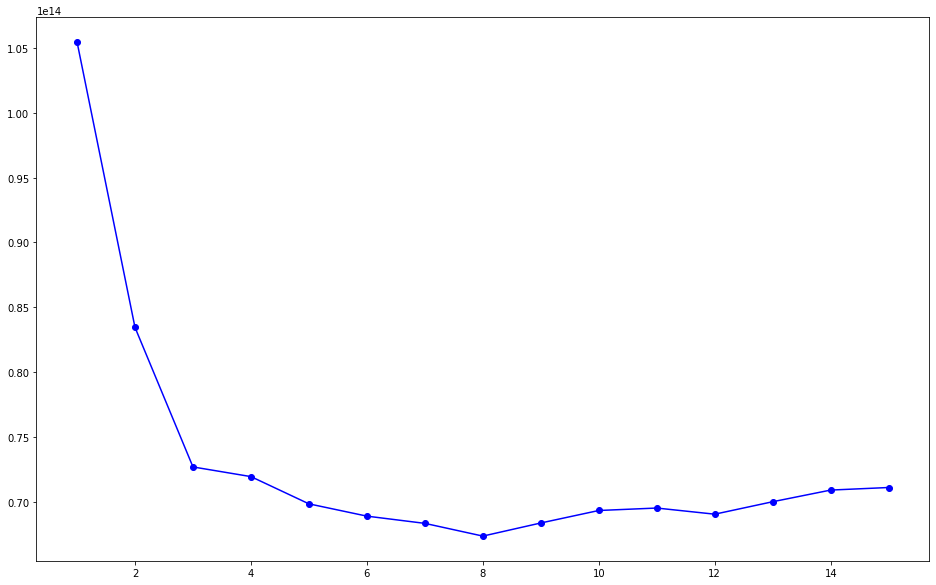

In [62]:
plt.figure(figsize=(16,10))
kvals = range(1, 16)
plt.plot(kvals, rss_all,'bo-')

In [66]:
for k, rss in zip(kvals, rss_all):
    if rss == min(rss_all):
        k_best = k

k_best

8

**RSS on the TEST data using the value of k found above**

In [74]:
prediction_test = predict_multiple_output_k_nearest_neighbors(k, features_train, output_train,  features_test)
rss_test = ((prediction_test - output_test)**2).sum()
rss_test

134342939295287.66